In [2]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import json
import cPickle as pk
import os
import numpy as np
import pandas as pd
from time import time
import cv2
import matplotlib.pyplot as plt
import re
from glob import iglob
%matplotlib inline

In [30]:
def create_model(output_layer='block4_pool'):
    base_model = VGG19(weights='imagenet')
    model = Model(input=base_model.input, output=base_model.get_layer(output_layer).output)
    return model

def extract_feats(img_path):
        try:
            # need to crop out logo from image
            img = image.load_img(ims[0], target_size=(250, 250))
            img = img.crop((0, 0, 224, 224))
        except IOError:
            print 'couldn\'t load file'
            return None

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = model.predict(x)
        return features

In [60]:
ims = list(iglob('analytical360/new_images/*.jpg'))

In [61]:
ims[0]

'analytical360/new_images/gorillaglue588756.jpg'

In [10]:
len(ims)

1105

In [38]:
model = create_model(output_layer='block4_pool')

In [39]:
feats = extract_feats(ims[0])

In [40]:
feats.shape

(1, 512, 14, 14)

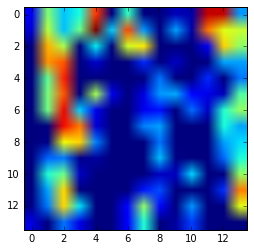

In [41]:
f = plt.imshow(feats[0][0])

In [26]:
img = image.load_img(ims[0], target_size=(224, 224))
print img

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F385E52CA10>


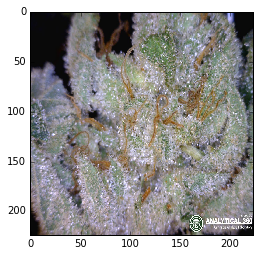

In [21]:
f = plt.imshow(img)

<PIL.Image._ImageCrop image mode=RGB size=224x224 at 0x7F385E1B9110>


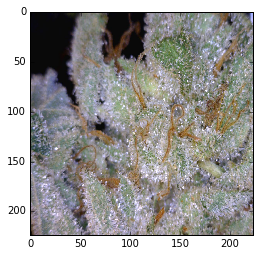

In [29]:
img = image.load_img(ims[0], target_size=(250, 250))
img = img.crop((0, 0, 224, 224))
print img
f = plt.imshow(img)

# Now for the production/training

In [42]:
model = create_model(output_layer='fc2')

In [49]:
import analytical360.scrape_360 as sc3
cannabinoids, terpenes, no_imgs, im_sources, names, clean_names = sc3.load_raw_scrape()
flow_df = pd.read_pickle('analytical360/flow_df.pk')
flow_df = sc3.clean_flow_df(flow_df, clean_names)

analytical360/scrape_360.py:430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[c] = df[c].astype('float64')


In [50]:
flow_df.iloc[0]

activated                                         0.43
cbd                                              14.92
link         http://analytical360.com/m/flowers/612153
name                                            Remedy
thc                                               0.87
im_name                               remedy612153.jpg
Name: 0, dtype: object

In [51]:
flow_df['total'] = flow_df['cbd'] + flow_df['thc']

In [53]:
target = flow_df['total'].values
ims = flow_df['im_name'].values

In [63]:
from sklearn.model_selection import train_test_split
from time import time

In [64]:
feats = []
for i in ims:
    start = time()
    feats.append(extract_feats('analytical360/new_images/' + i))
    print 'took', time() - start, 'seconds'

took 6.61178803444 seconds
took 6.55308198929 seconds
took 6.56057810783 seconds
took 6.62958812714 seconds
took 7.26619696617 seconds
took 7.52691102028 seconds
took 6.82003116608 seconds


KeyboardInterrupt: 

In [62]:
feat = extract_feats('analytical360/new_images/' + ims[0])